In [1]:
# Les imports
import sys
import os

import pandas as pd

sys.path.append(os.path.abspath(os.path.join("..", "src")))
print(sys.path)
# Charger les données des films
df = pd.read_csv('../data/raw/movie_genre_stats.csv')

# Afficher un sample des data
df.head()

['D:\\PythonIASpace\\PythonConda\\analyze_movie\\notebook', 'D:\\PythonIASpace\\PythonConda', 'C:\\Users\\fhoulette2023\\AppData\\Local\\Programs\\PyCharm 2025.1.1.1\\plugins\\python-ce\\helpers\\pydev', 'C:\\Users\\fhoulette2023\\AppData\\Local\\Programs\\PyCharm 2025.1.1.1\\plugins\\python-ce\\helpers\\jupyter_debug', 'C:\\ProgramData\\anaconda3\\python312.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor', 'D:\\PythonIASpace\\PythonConda\\analyze_movie\\src']


,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Spliter les données / Préparation des datasets
# -> si un film va faire un succès, donc s'il a vandu bcp de tickets
# pas 'Gross' / Chiffre d'Affaires, car on n'a pas le budget associé et on ne sait pas si bénéficiaire ou déficitaire

# Ce sur quoi on se base: les genres et le nb de films par genre
x = df[['Genre', 'Movies Released']]

# Critère de prédiction
y = df['Tickets Sold']

# problème: le genre est textuel
# convertir le textuel en numérique
# il faut convertir les str en int (faire du genre un index)
# stocker la conversion dans une var preprocessor
categorical_features = ['Genre']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'),
         categorical_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False, # optionnel, pour noms plus clairs
    force_int_remainder_cols=False # évite le warning
)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
# On tente avec linearRegression car on ne connait pas encore le meilleur modèle
from sklearn.pipeline import Pipeline
# sans transformation de colonnes
# model = LinearRegression()
# avec version de colonnes transformées
# en important Pipeline pour transformer en préproduction
model = Pipeline(
    steps=[
    # convertir la colonne 'Genre' en index avec la var preprocessor
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
    ]
)

model.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression())])

In [4]:
# lancer une prédiction avec les 20% des données splitées
predictions = model.predict(x_test)
print(predictions[:5])

[1.05131133e+07 2.96564318e+06 6.65584938e+07 3.42515453e+08
 5.87225292e+06]


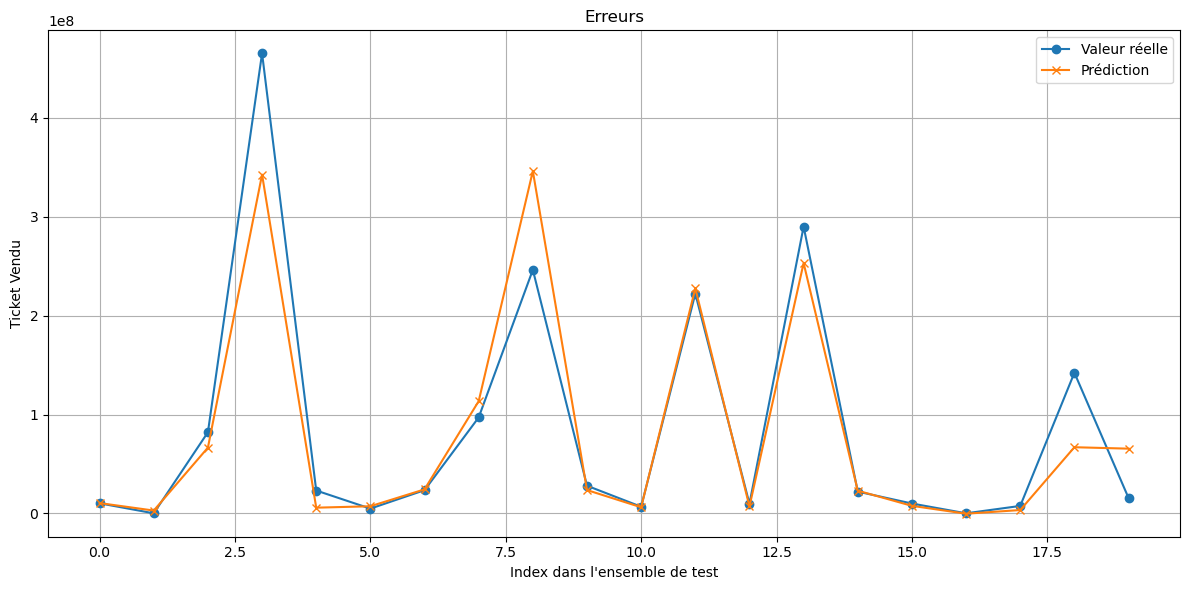

In [5]:
from graph_utils import display_predict_diff_errors

# faire un visuel des prédictions et des valeurs réelles et de la marge d'erreurs, en se basant sur les 20% de datatest
# en orange la prédiction
# en bleu les valeurs réelles

# importer notre fonction display_predic_diff_errors(y_test,predictions) de notre src/graph_utils.py
# l'import du dossier src se fait tout en haut de notebook
# importer nos fonctions customs


# appler ma fonction va afficher un graph de comparaison entre données prédites et réeles
display_predict_diff_errors(y_test, predictions)



In [6]:
# Refaire avec un randomForest
from sklearn.ensemble import RandomForestRegressor
model = Pipeline(
    steps=[
    # convertir la colonne 'Genre' en index avec la var preprocessor
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
    ]
)

model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])],
                                   verbose_feature_names_out=False)),
                ('regressor', RandomForestRegressor())])

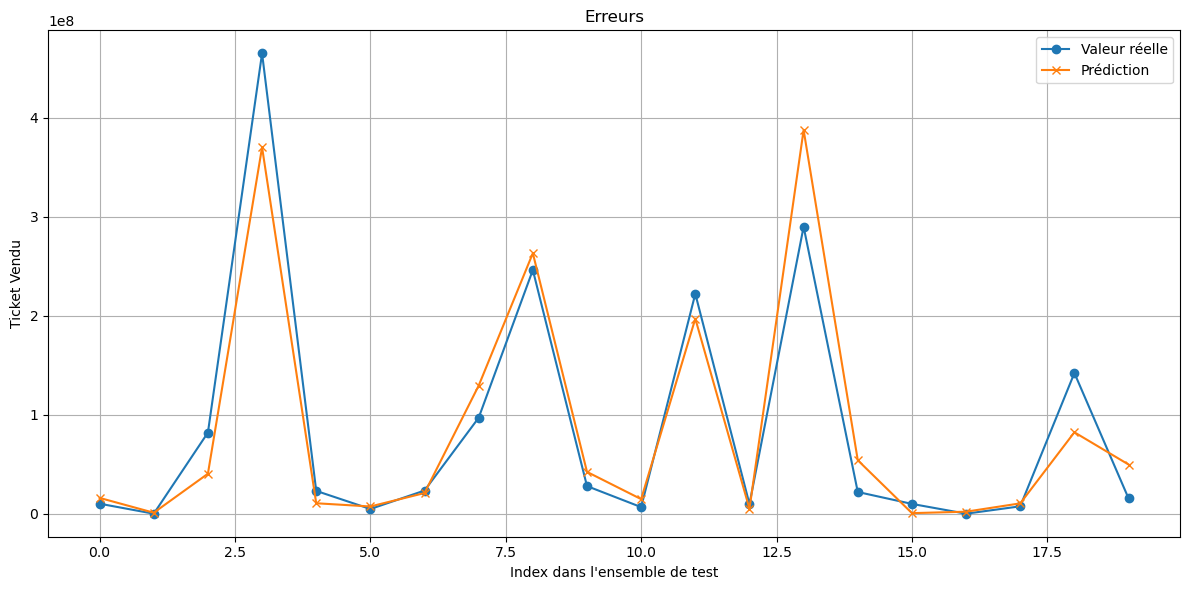

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Avant :sans colonne transformée
# model = LinearRegression()
# Aprés: version colonne transformé
model_rfr = Pipeline(
    steps=[
        ('preprocessor', preprocessor), # convertir la colonne Genre en index (textuelle en numérique)
        ('regressor', RandomForestRegressor())
    ]
)

model_rfr.fit(x_train, y_train)

# Lancer une prediction avec les 20% des données splitées
predictions = model_rfr.predict(x_test)

# appler ma fonction va afficher un graph de comparaison entre données prédites et réeles
display_predict_diff_errors(y_test, predictions)

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 1992559623486369.5
